In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Load data from csv file

In [2]:
data = pd.read_csv('DR_Demo_Lending_Club.csv', header=0)

In [3]:
data.describe()

,Id,is_bad,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog
count,10000.00000,10000.000000,9999.000000,10000.000000,9995.000000,9995.000000,3684.000000,840.000000,9995.000000,9995.000000,1.000000e+04,9974.000000,9995.000000,9968.0,10000.000000
mean,5000.50000,0.129500,68203.011539,13.338704,0.148174,1.066933,35.890337,61.652381,9.334567,0.060130,1.427101e+04,48.450771,22.011306,0.0,2.002200
std,2886.89568,0.335769,48590.252757,6.754212,0.506270,1.476052,22.361443,46.189619,4.526590,0.251245,2.543791e+04,28.220557,11.709400,0.0,0.810963
min,1.00000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.0,1.000000
25%,2500.75000,0.000000,40000.000000,8.160000,0.000000,0.000000,18.000000,0.000000,6.000000,0.000000,3.524500e+03,25.000000,13.000000,0.0,1.000000
50%,5000.50000,0.000000,58000.000000,13.410000,0.000000,1.000000,34.000000,86.000000,9.000000,0.000000,8.645500e+03,48.700000,20.000000,0.0,2.000000
75%,7500.25000,0.000000,82000.000000,18.692500,0.000000,2.000000,53.000000,101.000000,12.000000,0.000000,1.695225e+04,71.800000,29.000000,0.0,3.000000
max,10000.00000,1.000000,900000.000000,29.990000,11.000000,25.000000,120.000000,119.000000,39.000000,3.000000,1.207359e+06,100.600000,90.000000,0.0,3.000000


In [4]:
data.head()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,...,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,...,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,...,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3


In [5]:
count_bad = len(data[data['is_bad']==1])
count_good = len(data[data['is_bad']==0])
pct_of_bad = count_bad/(count_bad+count_good)
print("percentage of bad loan is ", pct_of_bad*100)
pct_of_good = count_good/(count_bad+count_good)
print("percentage of good loan is ", pct_of_good*100)

percentage of bad loan is  12.950000000000001
percentage of good loan is  87.05000000000001


In [6]:
data = data.drop('emp_title', axis = 1)
data = data.drop('Notes', axis = 1)

In [6]:
# temporary added cells

data = data.drop('purpose', axis = 1) 
data = data.drop('Id', axis = 1) 
#data = data.drop('emp_title', axis = 1)
data = data.drop('Notes', axis = 1)

data['earliest_cr_line'].fillna(data['earliest_cr_line'].value_counts().index[0], inplace=True)
data['policy_code'].fillna(data['policy_code'].value_counts().index[0], inplace=True)
data['emp_title'].fillna(data['emp_title'].value_counts().index[0], inplace=True)
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
data['open_acc'].fillna(data['open_acc'].median(), inplace=True)

In [7]:
for i in data:
    if data[i].isna().values.any():
        print(i, "There is NULL Values")

delinq_2yrs There is NULL Values
inq_last_6mths There is NULL Values
mths_since_last_delinq There is NULL Values
mths_since_last_record There is NULL Values
pub_rec There is NULL Values
revol_util There is NULL Values
total_acc There is NULL Values
collections_12_mths_ex_med There is NULL Values


In [8]:
data['delinq_2yrs'].fillna(data['delinq_2yrs'].median(), inplace=True)
data['inq_last_6mths'].fillna(data['inq_last_6mths'].median(), inplace=True)
data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].median(), inplace=True)
data['mths_since_last_record'].fillna(data['mths_since_last_record'].median(), inplace=True)
data['pub_rec'].fillna(data['pub_rec'].median(), inplace=True)
data['revol_util'].fillna(data['revol_util'].median(), inplace=True)
data['total_acc'].fillna(data['total_acc'].median(), inplace=True)
data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].median(), inplace=True)


In [11]:
print(len(list(data.columns)))

25


In [12]:

for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        print('not able to convert', column)
        data[column] = le.fit_transform(data[column])


X = data.loc[:, data.columns != 'is_bad']
Y = data.loc[:, data.columns == 'is_bad']

logreg = LogisticRegression()

rfe = RFE(logreg, 24)
rfe = rfe.fit(X, Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.15, random_state = 6)

In [32]:
logreg=LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(0, 8)))
        ,penalty='l2'
        ,cv=5
        ,max_iter=10000
        ,solver='lbfgs')

logreg.fit(xTrain, yTrain['is_bad'])

LogisticRegressionCV(Cs=[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=10000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [33]:
score = logreg.score(xTest, yTest['is_bad'])
print(score)

0.868


In [30]:
lg_probas = logreg.predict_proba(xTest)
log_loss = log_loss(yTest, lg_probas)
print(log_loss)

TypeError: 'numpy.float64' object is not callable

In [31]:
predict_y = logreg.predict(xTest)
f1 = f1_score(yTest, predict_y, average="macro")
print(f1)

0.46466809421841543


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
predict_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
data = data.drop('zip_code', axis = 1)
data = data.drop('initial_list_status', axis = 1)
data = data.drop('pymnt_plan', axis = 1)
data = data.drop('policy_code', axis = 1)
data = data.drop('home_ownership', axis = 1)
data = data.drop('purpose', axis = 1) 

data = data.drop('collections_12_mths_ex_med', axis = 1)
data = data.drop('delinq_2yrs', axis = 1)
data = data.drop('inq_last_6mths', axis = 1)
data = data.drop('mths_since_last_record', axis = 1)
data = data.drop('total_acc', axis = 1)
data = data.drop('revol_util', axis = 1)
data = data.drop('pub_rec', axis = 1)

# I have to remove this one since there are just too many NAN there.
data = data.drop('mths_since_last_delinq', axis = 1)

In [8]:
print(list(data.columns))

['Id', 'is_bad', 'emp_length', 'annual_inc', 'verification_status', 'purpose_cat', 'addr_state', 'debt_to_income', 'earliest_cr_line', 'open_acc', 'revol_bal', 'mths_since_last_major_derog']


In [9]:
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
data['earliest_cr_line'].fillna(data['earliest_cr_line'].value_counts().index[0], inplace=True)
data['open_acc'].fillna(data['open_acc'].median(), inplace=True)

In [10]:
for i in data:
    if data[i].isna().values.any():
        print(i, "There is NULL Values")

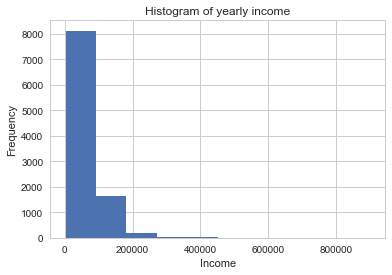

In [11]:
data.annual_inc.hist()
plt.title('Histogram of yearly income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [12]:
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

# Not worrying about one hot encoding at this time.

In [13]:
for i in data:
    print(data[i].describe())

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: Id, dtype: float64
count    10000.000000
mean         0.129500
std          0.335769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_bad, dtype: float64
count    10000.000000
mean         4.335200
std          4.018639
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         13.000000
Name: emp_length, dtype: float64
count     10000.000000
mean      68201.991238
std       48587.930068
min        2000.000000
25%       40000.000000
50%       58000.000000
75%       82000.000000
max      900000.000000
Name: annual_inc, dtype: float64
count    10000.000000
mean         1.115300
std          0.863065
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000


In [14]:
#cat_vars=['verification_status', 'purpose_cat', 'addr_state', 'earliest_cr_line']
#for var in cat_vars:
#    cat_list='var'+'_'+var
#    cat_list = pd.get_dummies(data[var], prefix=var)
#    data1=data.join(cat_list)
#    data=data1

#cat_vars=['verification_status', 'purpose_cat', 'addr_state', 'earliest_cr_line']
#data_vars=data.columns.values.tolist()
#to_keep=[i for i in data_vars if i not in cat_vars]

In [15]:
#data_final=data[to_keep]
data_final=data

In [16]:
data_final = data_final.drop('Id', axis = 1)

In [17]:
data_final = data_final.sample(n=10000)

In [18]:
print(len(data_final.columns))

11


In [19]:
X_data = data_final.loc[:, data_final.columns != 'is_bad']
Y_data = data_final.loc[:, data_final.columns == 'is_bad']

In [20]:
print(len(X_data.columns))
print(len(Y_data.columns))

10
1


In [21]:
xTrain, xTest, yTrain, yTest = train_test_split(X_data, Y_data, test_size = 0.15, random_state = 0)

In [22]:
logreg=LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(0, 5)))
        ,penalty='l2'
        ,cv=5
        ,max_iter=10000
        ,solver='lbfgs')

logreg.fit(xTrain, yTrain['is_bad'])

LogisticRegressionCV(Cs=[1.0, 10.0, 100.0, 1000.0, 10000.0],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=10000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [23]:
score = logreg.score(xTest, yTest['is_bad'])
print(score)

0.8833333333333333


In [24]:
lg_probas = logreg.predict_proba(xTest)
log_loss = log_loss(yTest, lg_probas)
print(log_loss)

0.36651168916311994


In [25]:
predict_y = logreg.predict(xTest)
f1 = f1_score(yTest, predict_y, average="macro")
print(f1)

0.4690265486725664


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
predict_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
def create_baseline():
    model = Sequential()
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:

kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []
for train, test in kfold.split(xTrain.values, yTrain['is_bad'].values):
  # create model
    model = Sequential()
    model.add(Dense(10, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(xTrain.values[train], yTrain['is_bad'].values[train], epochs=10, batch_size=20)
    # evaluate the model
    scores = model.evaluate(xTrain.values[test], yTrain['is_bad'].values[test])
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
6800/6800 [==============================] - 0s 61us/step - loss: 13.8417 - acc: 0.1318
Epoch 2/10
6800/6800 [==============================] - 0s 34us/step - loss: 13.8417 - acc: 0.1318
Epoch 3/10
6800/6800 [==============================] - 0s 34us/step - loss: 13.8417 - acc: 0.1318
Epoch 4/10
6800/6800 [==============================] - 0s 37us/step - loss: 13.8417 - acc: 0.1318
Epoch 5/10
6800/6800 [==============================] - 0s 30us/step - loss: 13.8417 - acc: 0.1318
Epoch 6/10
6800/6800 [==============================] - 0s 29us/step - loss: 13.8417 - acc: 0.1318
Epoch 7/10
6800/6800 [==============================] - 0s 31us/step - loss: 13.8417 - acc: 0.1318
Epoch 8/10
6800/6800 [==============================] - 0s 31us/step - loss: 13.8417 - acc: 0.1318
Epoch 9/10
6800/6800 [==============================] - 0s 35us/step - loss: 13.8417 - a